### Comparing Semantic Similarity via cosine similarity

In [125]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

In [211]:
s1 = "As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead."
s2 = "Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities."
s3 = "With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth."
s4 = "The mild spring weather marks the transition from the cold winter to the inviting warmth of summer."
s5 = "During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
s6 = "Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight."
s7 = "The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring."
s8 = "As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring."
s9 = "The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring."
s10 = "Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."

In [213]:
# data cleaning of sentences
concatenated = " ".join([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10])
all_sentences = [word.strip(" ").lower() for word in concatenated.split(".")[:-1]]
all_words = []
for sentence in all_sentences:
    sentence_list = [word.strip(",") for word in sentence.split(" ")]
    [all_words.append(word) for word in sentence_list]

# create dataframe
colnames = pd.Series(all_words).unique().tolist()
rownames = [f"s{num}" for num in range(1,11)]
df = pd.DataFrame(0, columns=colnames, index=rownames)

In [214]:
# weights: term frequency
# calculate value counts for each word in each sentence
all_row_values = []
for sentence in all_sentences:
    sentence_list = [word.strip(",") for word in sentence.split(" ")]
    values = [sentence_list.count(word) for word in sentence_list]
    value_count = dict(zip(sentence_list, values))
    all_row_values.append(value_count)
print(all_row_values)

# fill in the appropriate values in df (if not appearing in sentence, value will stay 0)
for row_num, row in enumerate(rownames):
    for col in colnames:
        if col in all_row_values[row_num].keys(): #check that the key exists in the dictionary
            df.loc[row, col] = all_row_values[row_num][col]
df

[{'as': 1, 'spring': 1, 'unfolds': 1, 'the': 3, 'warmth': 1, 'of': 1, 'season': 1, 'encourages': 1, 'first': 1, 'blossoms': 1, 'to': 1, 'open': 1, 'signaling': 1, 'longer': 1, 'days': 1, 'ahead': 1}, {'spring': 1, 'brings': 1, 'not': 1, 'only': 1, 'blooming': 1, 'flowers': 1, 'but': 1, 'also': 1, 'the': 1, 'anticipation': 1, 'of': 1, 'sunny': 1, 'days': 1, 'and': 1, 'outdoor': 1, 'activities': 1}, {'with': 1, 'the': 2, 'arrival': 1, 'of': 1, 'spring': 1, 'people': 1, 'begin': 1, 'planning': 1, 'their': 1, 'summer': 1, 'vacations': 1, 'eager': 1, 'to': 1, 'enjoy': 1, 'seasonal': 1, 'warmth': 1}, {'the': 4, 'mild': 1, 'spring': 1, 'weather': 1, 'marks': 1, 'transition': 1, 'from': 1, 'cold': 1, 'winter': 1, 'to': 1, 'inviting': 1, 'warmth': 1, 'of': 1, 'summer': 1}, {'during': 1, 'spring': 1, 'families': 1, 'often': 1, 'start': 1, 'spending': 1, 'more': 1, 'time': 1, 'outdoors': 1, 'enjoying': 1, 'the': 2, "season's": 1, 'pleasant': 1, 'temperatures': 1, 'and': 1, 'promise': 1, 'of': 1, 

,as,spring,unfolds,the,warmth,of,season,encourages,first,blossoms,...,awaited,since,are,planned,grow,pattern,starts,culminating,peak,leisure
s1,1,1,1,3,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
s2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s3,0,1,0,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s4,0,1,0,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s5,0,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s6,0,0,0,1,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s7,0,1,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s8,1,1,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
s9,0,1,0,2,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
s10,1,1,0,2,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1


In [216]:
def cosine_sim(vec1, vec2):
    """Calculate the cosine similarity between two vectors"""
    v1 = np.array(vec1)
    v2 = np.array(vec2)
    return np.dot(v1, v2)/(norm(v1)*norm(v2))

print(cosine_sim(df.iloc[0], df.iloc[1]))

# df for cosine similarity scores
labels = [all_sentences[0][:22], all_sentences[1][:22], all_sentences[2][:26], all_sentences[3][:23], all_sentences[4][:23],
          all_sentences[5][:20], all_sentences[6][:20], all_sentences[7][:22], all_sentences[8][:26], all_sentences[9][:26]]
cos_df = pd.DataFrame(0.0, columns=labels, index=labels)

for row in range(cos_df.shape[0]):
    for col in range(cos_df.shape[1]):
        cos_df.iloc[row, col] = cosine_sim(df.iloc[row], df.iloc[col])
cos_df

0.3061862178478973


,"as spring unfolds, the",spring brings not only,with the arrival of spring,the mild spring weather,"during spring, families",summer continues the,the summer season is,"as summer arrives, the",the transition into summer,summer vacations are often
"as spring unfolds, the",1.000000,0.306186,0.468293,0.606478,0.348155,0.285774,0.365148,0.400892,0.311805,0.385758
spring brings not only,0.306186,1.000000,0.229416,0.278543,0.266501,0.300000,0.279508,0.327327,0.272772,0.188982
with the arrival of spring,0.468293,0.229416,1.000000,0.553819,0.342381,0.367065,0.359092,0.400501,0.300376,0.346844
the mild spring weather,0.606478,0.278543,0.553819,1.000000,0.435494,0.297113,0.415227,0.486265,0.445742,0.386024
"during spring, families",0.348155,0.266501,0.342381,0.435494,1.000000,0.341121,0.381385,0.372194,0.372194,0.322329
summer continues the,0.285774,0.300000,0.367065,0.297113,0.341121,1.000000,0.313050,0.218218,0.218218,0.188982
the summer season is,0.365148,0.279508,0.359092,0.415227,0.381385,0.313050,1.000000,0.536745,0.341565,0.422577
"as summer arrives, the",0.400892,0.327327,0.400501,0.486265,0.372194,0.218218,0.536745,1.000000,0.285714,0.494872
the transition into summer,0.311805,0.272772,0.300376,0.445742,0.372194,0.218218,0.341565,0.285714,1.000000,0.288675
summer vacations are often,0.385758,0.188982,0.346844,0.386024,0.322329,0.188982,0.422577,0.494872,0.288675,1.000000


<Axes: >

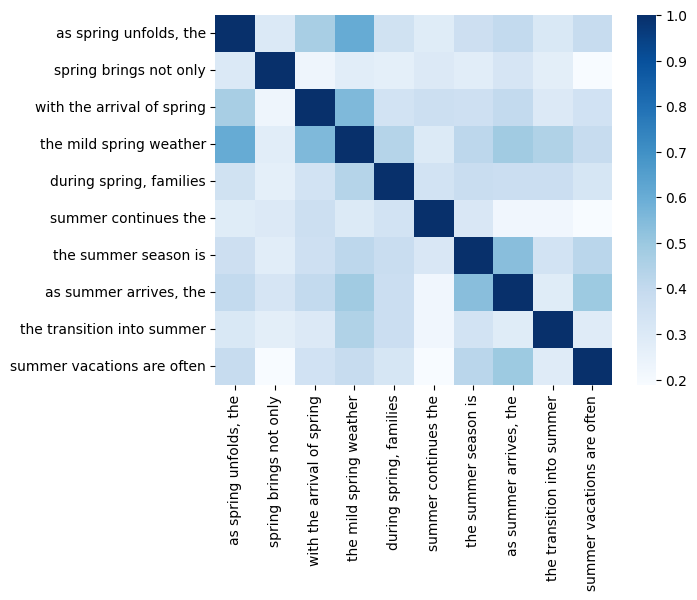

In [217]:
# create heatmap 
import seaborn as sns
sns.heatmap(cos_df, cmap="Blues")